In [163]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [185]:
df = pd.read_csv(r"C:\Users\miqqi\Documents\DataScience Bootcamp\Bootcamp\Python\ifood_df_raw - ifood_df_raw.csv")

In [187]:
pd.set_option('display.max_columns', None)
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,"$84,835.00",0,0,6/16/14,0,189,104,379,111,189,218,1,4,4,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,"$57,091.00",0,0,6/15/14,0,464,5,64,7,0,37,1,7,3,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,"$67,267.00",0,1,5/13/14,0,134,11,59,15,2,30,1,3,2,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,"$32,474.00",1,1,5/11/14,0,10,0,1,0,0,0,1,1,0,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,"$21,474.00",1,0,4/8/14,0,6,16,24,11,0,34,2,3,1,2,7,1,0,0,0,0,1,0,SP


## Section_1: Data Analysis and Preprocessing

In [189]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   2240 non-null   int64 
 1   Year_Birth           2240 non-null   int64 
 2   Education            2240 non-null   object
 3   Marital_Status       2240 non-null   object
 4   Income               2216 non-null   object
 5   Kidhome              2240 non-null   int64 
 6   Teenhome             2240 non-null   int64 
 7   Dt_Customer          2240 non-null   object
 8   Recency              2240 non-null   int64 
 9   MntWines             2240 non-null   int64 
 10  MntFruits            2240 non-null   int64 
 11  MntMeatProducts      2240 non-null   int64 
 12  MntFishProducts      2240 non-null   int64 
 13  MntSweetProducts     2240 non-null   int64 
 14  MntGoldProds         2240 non-null   int64 
 15  NumDealsPurchases    2240 non-null   int64 
 16  NumWeb

In [191]:
df.nunique()

ID                     2240
Year_Birth               59
Education                 5
Marital_Status            8
Income                 1974
Kidhome                   3
Teenhome                  3
Dt_Customer             663
Recency                 100
MntWines                776
MntFruits               158
MntMeatProducts         558
MntFishProducts         182
MntSweetProducts        177
MntGoldProds            213
NumDealsPurchases        15
NumWebPurchases          15
NumCatalogPurchases      14
NumStorePurchases        14
NumWebVisitsMonth        16
AcceptedCmp3              2
AcceptedCmp4              2
AcceptedCmp5              2
AcceptedCmp1              2
AcceptedCmp2              2
Response                  2
Complain                  2
Country                   8
dtype: int64

In [193]:
df.describe()

,ID,Year_Birth,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,5592.159821,1968.805804,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,2.325000,4.084821,2.662054,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.149107,0.009375
std,3246.662198,11.984069,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,1.932238,2.778714,2.923101,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.356274,0.096391
min,0.000000,1893.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2828.250000,1959.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5458.500000,1970.000000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,8427.750000,1977.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,11191.000000,1996.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [195]:
df.describe(include = 'object')

,Education,Marital_Status,Income,Dt_Customer,Country
count,2240,2240,2216,2240,2240
unique,5,8,1974,663,8
top,Graduation,Married,"$7,500.00",8/31/12,SP
freq,1127,864,12,12,1095


In [197]:
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Response                0
Complain                0
Country                 0
dtype: int64

## We need to analyze the distrubution of the "Income" column to check if it is possible to replace the null values with the mean. For that we need to convert the data type of the 'Income' column to float64

In [200]:
# We hace removed '$' and "," in the string so that the conversion to 'float' data type can occur
# We have converted the datatype of the 'Income' column to float
df['Income'] = df['Income'].str.replace('$', '') 
df['Income'] = df['Income'].str.replace(',', '')
df['Income'] = df['Income'].astype('float')

In [202]:
df['Income']

0       84835.0
1       57091.0
2       67267.0
3       32474.0
4       21474.0
         ...   
2235    66476.0
2236    31056.0
2237    46310.0
2238    65819.0
2239    94871.0
Name: Income, Length: 2240, dtype: float64

<Axes: xlabel='Income', ylabel='Count'>

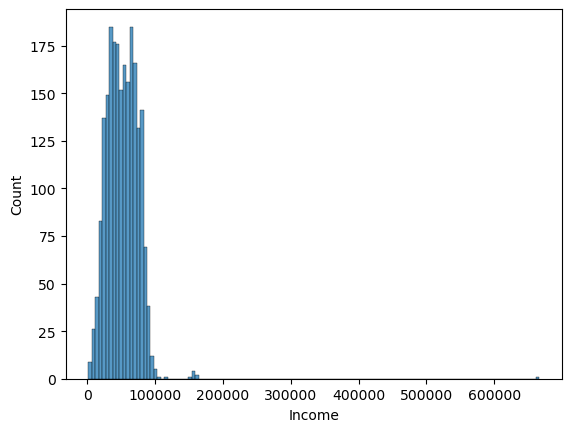

In [204]:
sns.histplot(x = df['Income'], data = df)

### We are going to drop the outlier

In [219]:
df = df.drop(df.index[527])

C:\Users\miqqi\AppData\Local\Temp\ipykernel_9600\1232237938.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Income'])


<Axes: xlabel='Income', ylabel='Density'>

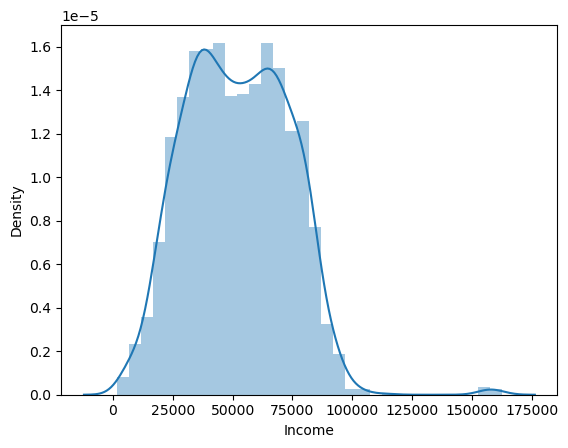

In [227]:
from scipy.stats import skew
sns.distplot(df['Income'])

In [229]:
df['Income'].skew()

0.3473496759140282

### Since the value of skewness lies between -0.5 and 0.5 we can say that the data is approximately normally distributed. Hence replacing the null values with the mean would be appropriate.

In [248]:
df[df['Income'].isnull()]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
134,8996,1957,PhD,Married,NaN,2,1,11/19/12,4,230,42,192,49,37,53,12,7,2,8,9,0,0,0,0,0,0,0,GER
262,1994,1983,Graduation,Married,NaN,1,0,11/15/13,11,5,5,6,0,2,1,1,1,0,2,7,0,0,0,0,0,0,0,US
394,3769,1972,PhD,Together,NaN,1,0,3/2/14,17,25,1,13,0,0,3,1,1,0,3,7,0,0,0,0,0,0,0,AUS
449,5255,1986,Graduation,Single,NaN,1,0,2/20/13,19,5,1,3,3,263,362,0,27,0,0,1,0,0,0,0,0,0,0,AUS
525,8268,1961,PhD,Married,NaN,0,1,7/11/13,23,352,0,27,10,0,15,3,6,1,7,6,0,0,0,0,0,0,0,CA
590,10629,1973,2n Cycle,Married,NaN,1,0,9/14/12,25,25,3,43,17,4,17,3,3,0,3,8,0,0,0,0,0,0,0,GER
899,10475,1970,Master,Together,NaN,0,1,4/1/13,39,187,5,65,26,20,14,2,4,2,6,5,0,0,0,0,0,0,0,US
997,9235,1957,Graduation,Single,NaN,1,1,5/27/14,45,7,0,8,2,0,1,1,1,0,2,7,0,0,0,0,0,0,0,GER
1096,4345,1964,2n Cycle,Single,NaN,1,1,1/12/14,49,5,1,9,2,0,4,1,1,0,2,7,0,0,0,0,0,0,0,AUS
1185,7187,1969,Master,Together,NaN,1,1,5/18/13,52,375,42,48,94,66,96,7,4,10,4,3,0,0,0,0,0,0,0,AUS


In [252]:
mean_income = df['Income'].mean()

In [254]:
df['Income'].fillna(value = mean_income, inplace = True)

C:\Users\miqqi\AppData\Local\Temp\ipykernel_9600\1278448230.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Income'].fillna(value = mean_income, inplace = True)


In [258]:
df['Income'].isnull().sum()

0

### We have replaced the null values with the mean value in the Income column

In [271]:
df['Revenue_generated'] = df[['MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds']].sum(axis = 1) 

In [273]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,Revenue_generated
0,1826,1970,Graduation,Divorced,84835.0,0,0,6/16/14,0,189,104,379,111,189,218,1,4,4,6,1,0,0,0,0,0,1,0,SP,1190
1,1,1961,Graduation,Single,57091.0,0,0,6/15/14,0,464,5,64,7,0,37,1,7,3,7,5,0,0,0,0,1,1,0,CA,577
2,10476,1958,Graduation,Married,67267.0,0,1,5/13/14,0,134,11,59,15,2,30,1,3,2,5,2,0,0,0,0,0,0,0,US,251
3,1386,1967,Graduation,Together,32474.0,1,1,5/11/14,0,10,0,1,0,0,0,1,1,0,2,7,0,0,0,0,0,0,0,AUS,11
4,5371,1989,Graduation,Single,21474.0,1,0,4/8/14,0,6,16,24,11,0,34,2,3,1,2,7,1,0,0,0,0,1,0,SP,91


In [277]:
df['Total_Purchases'] = df[['NumDealsPurchases','NumWebPurchases','NumCatalogPurchases','NumStorePurchases']].sum(axis = 1)

In [279]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,Revenue_generated,Total_Purchases
0,1826,1970,Graduation,Divorced,84835.0,0,0,6/16/14,0,189,104,379,111,189,218,1,4,4,6,1,0,0,0,0,0,1,0,SP,1190,15
1,1,1961,Graduation,Single,57091.0,0,0,6/15/14,0,464,5,64,7,0,37,1,7,3,7,5,0,0,0,0,1,1,0,CA,577,18
2,10476,1958,Graduation,Married,67267.0,0,1,5/13/14,0,134,11,59,15,2,30,1,3,2,5,2,0,0,0,0,0,0,0,US,251,11
3,1386,1967,Graduation,Together,32474.0,1,1,5/11/14,0,10,0,1,0,0,0,1,1,0,2,7,0,0,0,0,0,0,0,AUS,11,4
4,5371,1989,Graduation,Single,21474.0,1,0,4/8/14,0,6,16,24,11,0,34,2,3,1,2,7,1,0,0,0,0,1,0,SP,91,8


In [281]:
df['Marital_Status'].unique()

array(['Divorced', 'Single', 'Married', 'Together', 'Widow', 'YOLO',
       'Alone', 'Absurd'], dtype=object)

In [285]:
dict_marital_status = {'Divorced': 1, 'Single': 1, 'Married': 2, 'Together': 2, 'Widow': 1, 'YOLO': 1, 'Alone': 1, 'Absurd':1}
dict_marital_status

{'Divorced': 1,
 'Single': 1,
 'Married': 2,
 'Together': 2,
 'Widow': 1,
 'YOLO': 1,
 'Alone': 1,
 'Absurd': 1}

In [291]:
df['Num_Family_Members'] = df[['Kidhome', 'Teenhome']].sum(axis = 1) + df['Marital_Status'].map(dict_marital_status)

In [293]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,Revenue_generated,Total_Purchases,Num_Family_Members
0,1826,1970,Graduation,Divorced,84835.0,0,0,6/16/14,0,189,104,379,111,189,218,1,4,4,6,1,0,0,0,0,0,1,0,SP,1190,15,1
1,1,1961,Graduation,Single,57091.0,0,0,6/15/14,0,464,5,64,7,0,37,1,7,3,7,5,0,0,0,0,1,1,0,CA,577,18,1
2,10476,1958,Graduation,Married,67267.0,0,1,5/13/14,0,134,11,59,15,2,30,1,3,2,5,2,0,0,0,0,0,0,0,US,251,11,3
3,1386,1967,Graduation,Together,32474.0,1,1,5/11/14,0,10,0,1,0,0,0,1,1,0,2,7,0,0,0,0,0,0,0,AUS,11,4,4
4,5371,1989,Graduation,Single,21474.0,1,0,4/8/14,0,6,16,24,11,0,34,2,3,1,2,7,1,0,0,0,0,1,0,SP,91,8,2


In [295]:
df['Education'].unique()

array(['Graduation', 'PhD', '2n Cycle', 'Master', 'Basic'], dtype=object)

In [299]:
dict_Education = {'Graduation': 16, 'PhD': 20, '2n Cycle': 18, 'Master': 18, 'Basic': 8}
dict_Education

{'Graduation': 16, 'PhD': 20, '2n Cycle': 18, 'Master': 18, 'Basic': 8}

In [301]:
df['Educational_years'] = df['Education'].map(dict_Education)

In [303]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,Revenue_generated,Total_Purchases,Num_Family_Members,Educational_years
0,1826,1970,Graduation,Divorced,84835.0,0,0,6/16/14,0,189,104,379,111,189,218,1,4,4,6,1,0,0,0,0,0,1,0,SP,1190,15,1,16
1,1,1961,Graduation,Single,57091.0,0,0,6/15/14,0,464,5,64,7,0,37,1,7,3,7,5,0,0,0,0,1,1,0,CA,577,18,1,16
2,10476,1958,Graduation,Married,67267.0,0,1,5/13/14,0,134,11,59,15,2,30,1,3,2,5,2,0,0,0,0,0,0,0,US,251,11,3,16
3,1386,1967,Graduation,Together,32474.0,1,1,5/11/14,0,10,0,1,0,0,0,1,1,0,2,7,0,0,0,0,0,0,0,AUS,11,4,4,16
4,5371,1989,Graduation,Single,21474.0,1,0,4/8/14,0,6,16,24,11,0,34,2,3,1,2,7,1,0,0,0,0,1,0,SP,91,8,2,16


In [307]:
df['Total_Campaign_Acceptance'] = df[['AcceptedCmp1','AcceptedCmp2','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5']].sum(axis = 1)

In [309]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,Revenue_generated,Total_Purchases,Num_Family_Members,Educational_years,Total_Campaign_Acceptance
0,1826,1970,Graduation,Divorced,84835.0,0,0,6/16/14,0,189,104,379,111,189,218,1,4,4,6,1,0,0,0,0,0,1,0,SP,1190,15,1,16,0
1,1,1961,Graduation,Single,57091.0,0,0,6/15/14,0,464,5,64,7,0,37,1,7,3,7,5,0,0,0,0,1,1,0,CA,577,18,1,16,1
2,10476,1958,Graduation,Married,67267.0,0,1,5/13/14,0,134,11,59,15,2,30,1,3,2,5,2,0,0,0,0,0,0,0,US,251,11,3,16,0
3,1386,1967,Graduation,Together,32474.0,1,1,5/11/14,0,10,0,1,0,0,0,1,1,0,2,7,0,0,0,0,0,0,0,AUS,11,4,4,16,0
4,5371,1989,Graduation,Single,21474.0,1,0,4/8/14,0,6,16,24,11,0,34,2,3,1,2,7,1,0,0,0,0,1,0,SP,91,8,2,16,1


In [407]:
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])

C:\Users\miqqi\AppData\Local\Temp\ipykernel_9600\177162232.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])


In [411]:
df.dtypes

ID                                    int64
Year_Birth                            int64
Education                            object
Marital_Status                       object
Income                              float64
Kidhome                               int64
Teenhome                              int64
Dt_Customer                  datetime64[ns]
Recency                               int64
MntWines                              int64
MntFruits                             int64
MntMeatProducts                       int64
MntFishProducts                       int64
MntSweetProducts                      int64
MntGoldProds                          int64
NumDealsPurchases                     int64
NumWebPurchases                       int64
NumCatalogPurchases                   int64
NumStorePurchases                     int64
NumWebVisitsMonth                     int64
AcceptedCmp3                          int64
AcceptedCmp4                          int64
AcceptedCmp5                    

## Section_2: Exploratory Data Analysis (EDA)

## Univariate Analysis of original features

<Axes: xlabel='Year_Birth', ylabel='Count'>

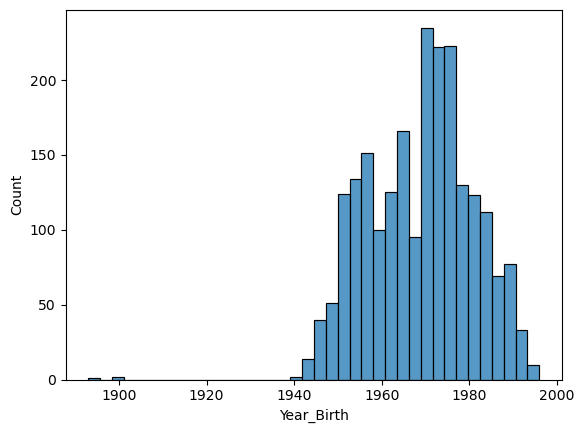

In [357]:
sns.histplot(data = df, x = df['Year_Birth'])

In [359]:
df[df['Year_Birth'] < 1920]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,Revenue_generated,Total_Purchases,Num_Family_Members,Educational_years,Total_Campaign_Acceptance
513,11004,1893,2n Cycle,Single,60182.0,0,1,5/17/14,23,8,0,5,7,0,2,1,1,0,2,4,0,0,0,0,0,0,0,SA,22,4,2,18,0
827,1150,1899,PhD,Together,83532.0,0,0,9/26/13,36,755,144,562,104,64,224,1,4,6,4,1,0,0,1,0,0,0,0,SP,1853,15,2,20,1
2233,7829,1900,2n Cycle,Divorced,36640.0,1,0,9/26/13,99,15,6,8,7,4,25,1,2,1,2,5,0,0,0,0,0,0,1,IND,65,6,2,18,0


In [363]:
# Removing outliers from column 'Year_Birth'
df.drop([513,827,2233], inplace = True)

In [375]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2236 entries, 0 to 2239
Data columns (total 33 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ID                         2236 non-null   int64  
 1   Year_Birth                 2236 non-null   int64  
 2   Education                  2236 non-null   object 
 3   Marital_Status             2236 non-null   object 
 4   Income                     2236 non-null   float64
 5   Kidhome                    2236 non-null   int64  
 6   Teenhome                   2236 non-null   int64  
 7   Dt_Customer                2236 non-null   object 
 8   Recency                    2236 non-null   int64  
 9   MntWines                   2236 non-null   int64  
 10  MntFruits                  2236 non-null   int64  
 11  MntMeatProducts            2236 non-null   int64  
 12  MntFishProducts            2236 non-null   int64  
 13  MntSweetProducts           2236 non-null   int64  
 1

C:\Users\miqqi\AppData\Local\Temp\ipykernel_9600\161316679.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Year_Birth'])


<Axes: xlabel='Year_Birth', ylabel='Density'>

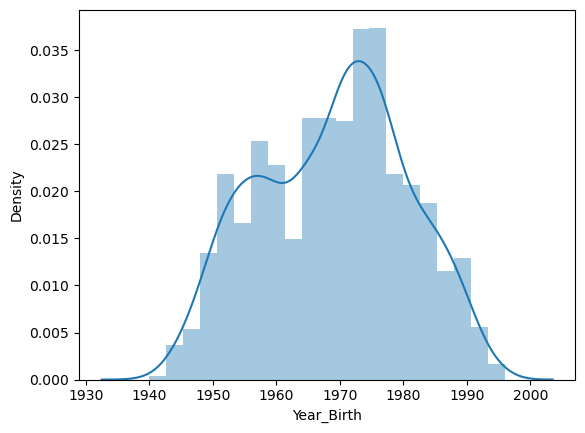

In [383]:
sns.distplot(df['Year_Birth'])

In [385]:
df['Year_Birth'].skew()

-0.09249457625893531

<Axes: xlabel='Education', ylabel='count'>

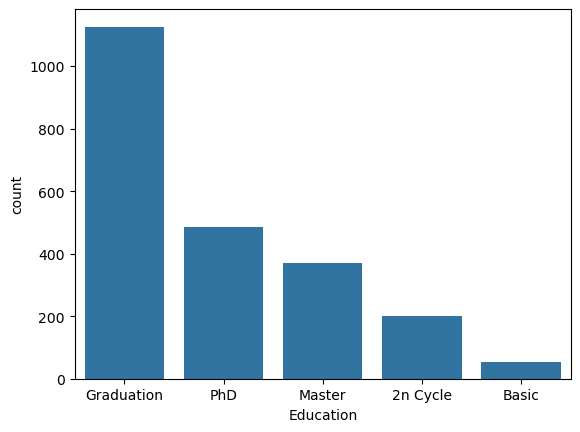

In [397]:
sns.barplot(df['Education'].value_counts())

<Axes: xlabel='Marital_Status', ylabel='count'>

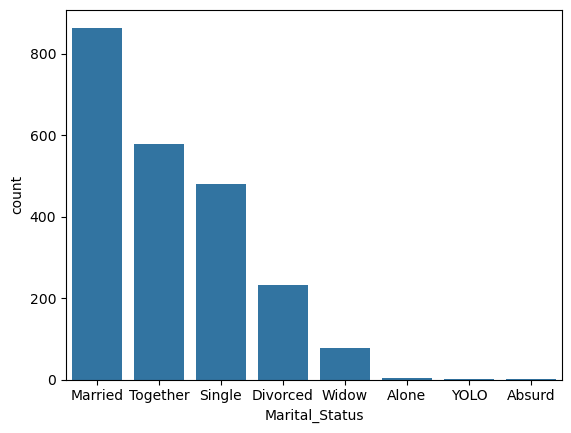

In [399]:
sns.barplot(df['Marital_Status'].value_counts())

<Axes: xlabel='Income', ylabel='Count'>

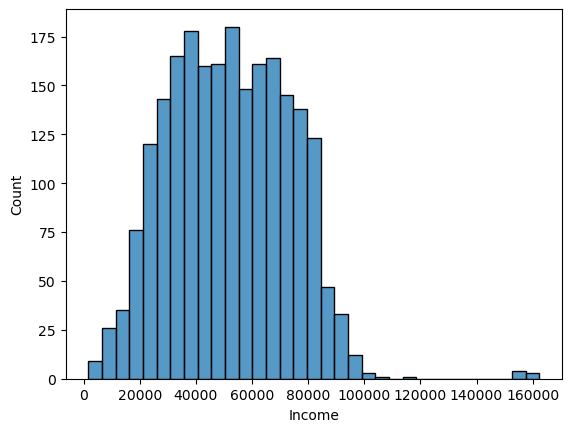

In [401]:
sns.histplot(df['Income'])

<Axes: xlabel='Kidhome', ylabel='count'>

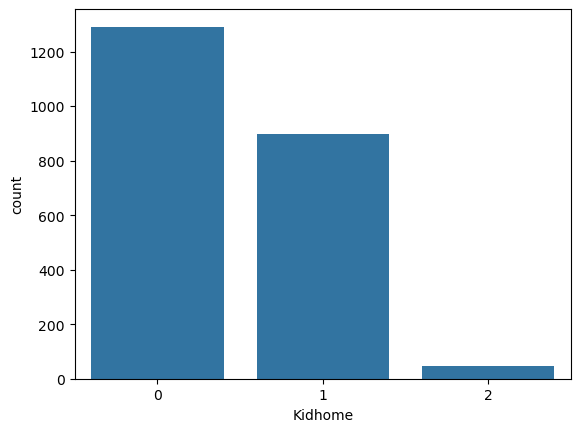

In [403]:
sns.barplot(df['Kidhome'].value_counts())

<Axes: xlabel='Teenhome', ylabel='count'>

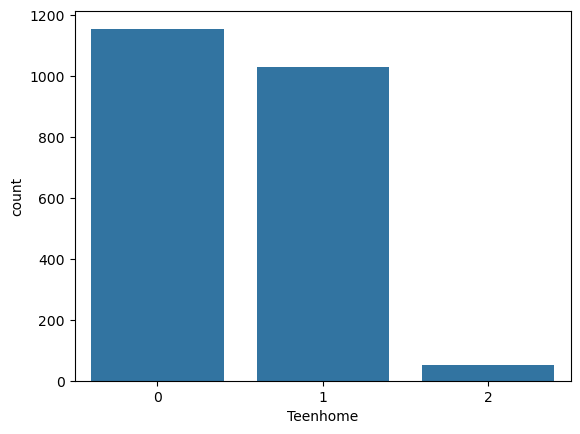

In [405]:
sns.barplot(df['Teenhome'].value_counts())

<Axes: xlabel='Dt_Customer', ylabel='count'>

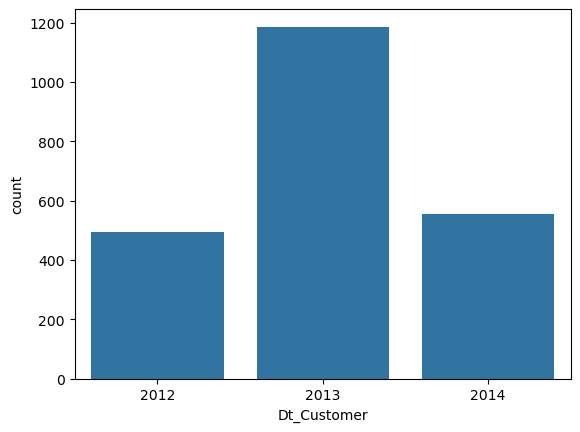

In [433]:
sns.barplot(df['Dt_Customer'].dt.year.value_counts())

<Axes: xlabel='Recency', ylabel='Count'>

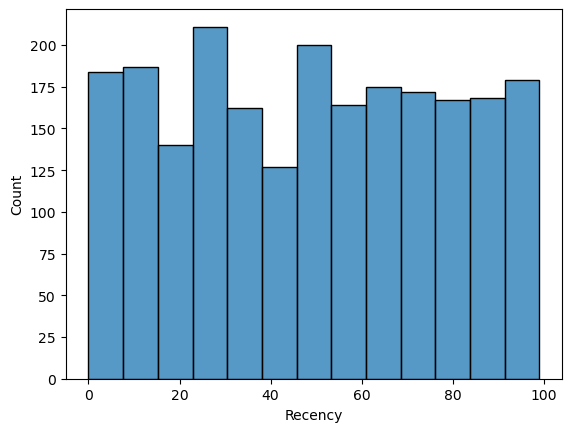

In [435]:
sns.histplot(df['Recency'])

<Axes: xlabel='MntWines', ylabel='Count'>

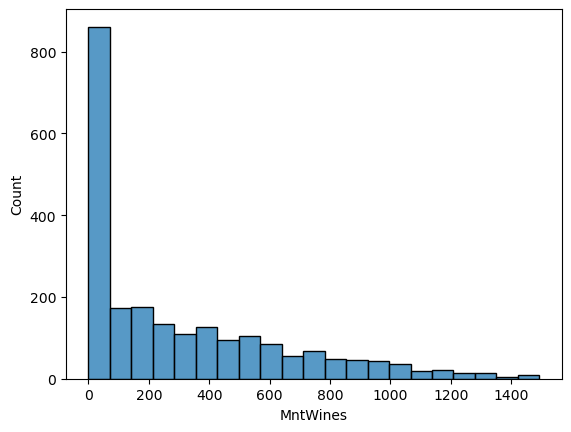

In [437]:
sns.histplot(df['MntWines'])

<Axes: xlabel='MntFruits', ylabel='Count'>

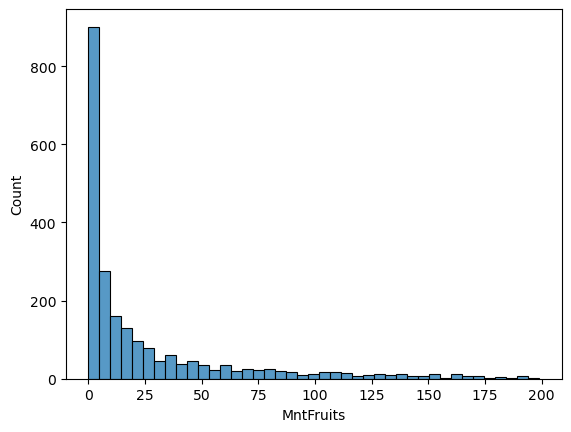

In [443]:
sns.histplot(df['MntFruits'])

<Axes: xlabel='MntFishProducts', ylabel='Count'>

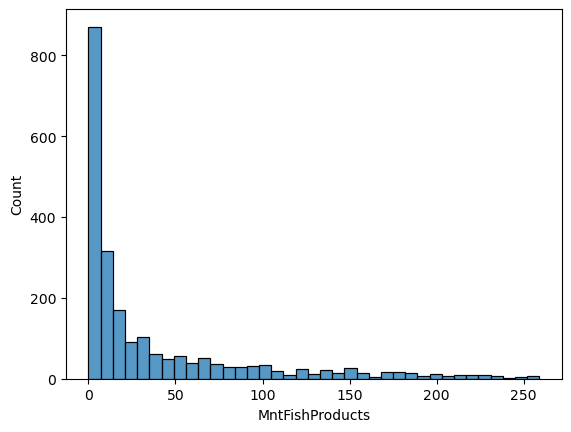

In [445]:
sns.histplot(df['MntFishProducts'])

<Axes: xlabel='MntMeatProducts', ylabel='Count'>

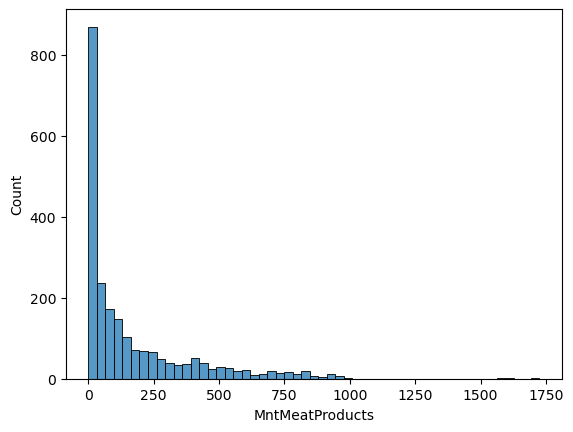

In [447]:
sns.histplot(df['MntMeatProducts'])

<Axes: xlabel='MntSweetProducts', ylabel='Count'>

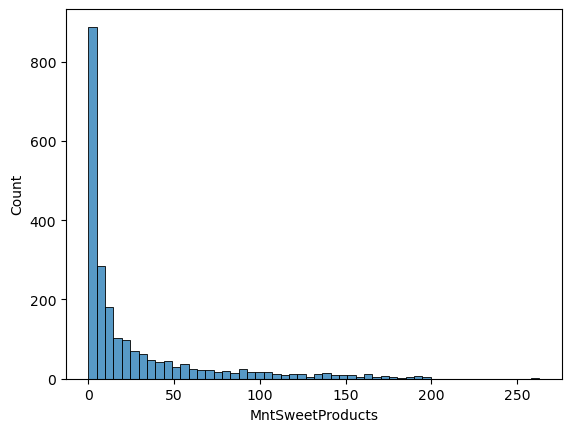

In [449]:
sns.histplot(df['MntSweetProducts'])

<Axes: xlabel='MntGoldProds', ylabel='Count'>

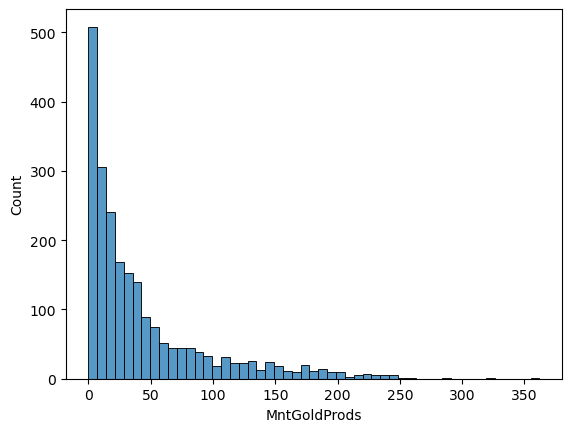

In [457]:
sns.histplot(df['MntGoldProds'])

<Axes: xlabel='Country', ylabel='count'>

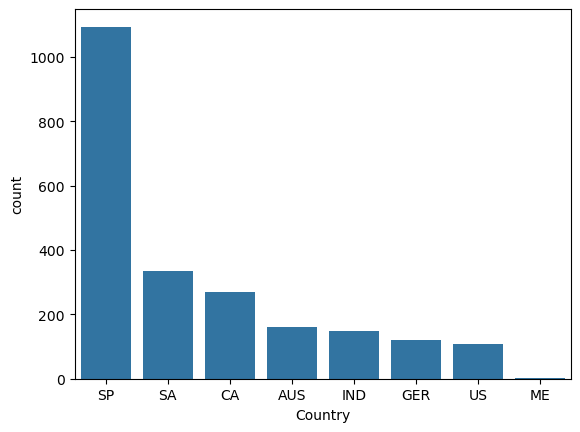

In [461]:
sns.barplot(df['Country'].value_counts())

## Univariate Analysis of the Engineered Features

<Axes: xlabel='Revenue_generated', ylabel='Count'>

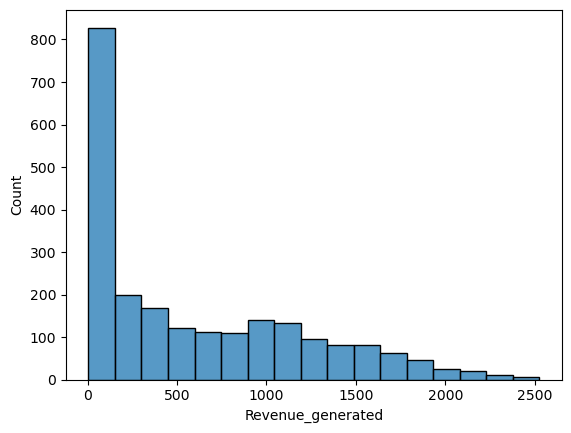

In [313]:
sns.histplot(data = df, x = df['Revenue_generated'])

<Axes: xlabel='Total_Purchases', ylabel='Count'>

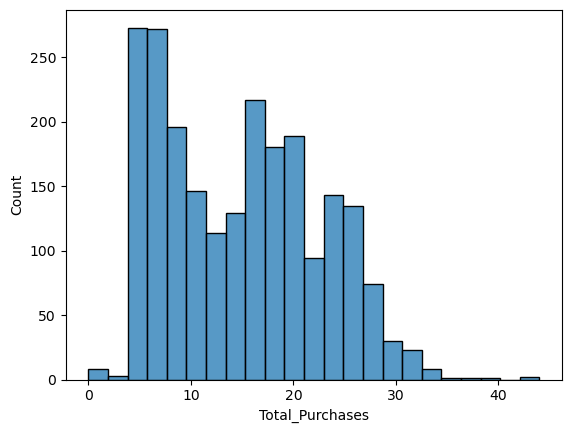

In [315]:
sns.histplot(data = df, x = df['Total_Purchases'])

<Axes: xlabel='Num_Family_Members', ylabel='Count'>

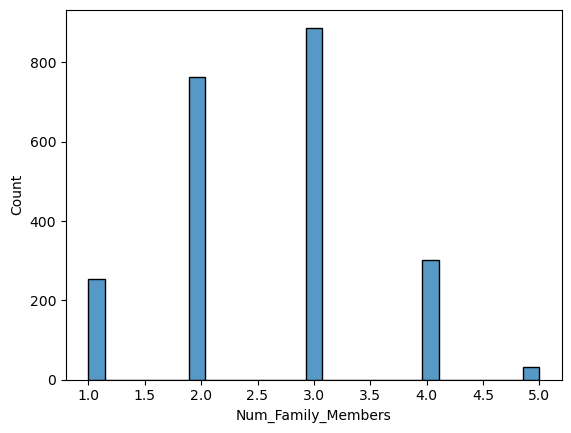

In [341]:
sns.histplot(df['Num_Family_Members'])

<Axes: xlabel='Educational_years', ylabel='Count'>

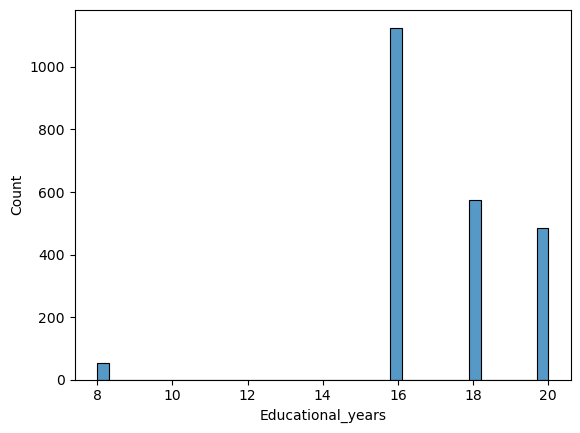

In [343]:
sns.histplot(df['Educational_years'])

<Axes: xlabel='Total_Campaign_Acceptance', ylabel='Count'>

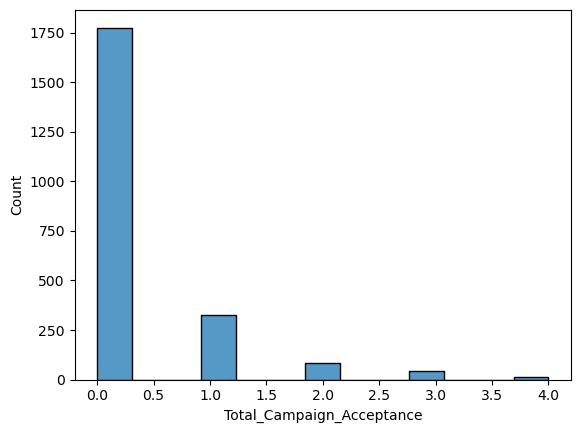

In [345]:
sns.histplot(df['Total_Campaign_Acceptance'])

## Bivariate Analysis

### We are going to conduct the bivariate analysis using heatmap

In [469]:
# We are not going to select all featues in our correlation matrix since that would result in an 'overloaded' visualization
df_corr = df[['Year_Birth','Income','Recency','NumWebVisitsMonth','Response','Complain','Revenue_generated','Total_Purchases','Num_Family_Members','Educational_years','Total_Campaign_Acceptance']].corr()

<Axes: >

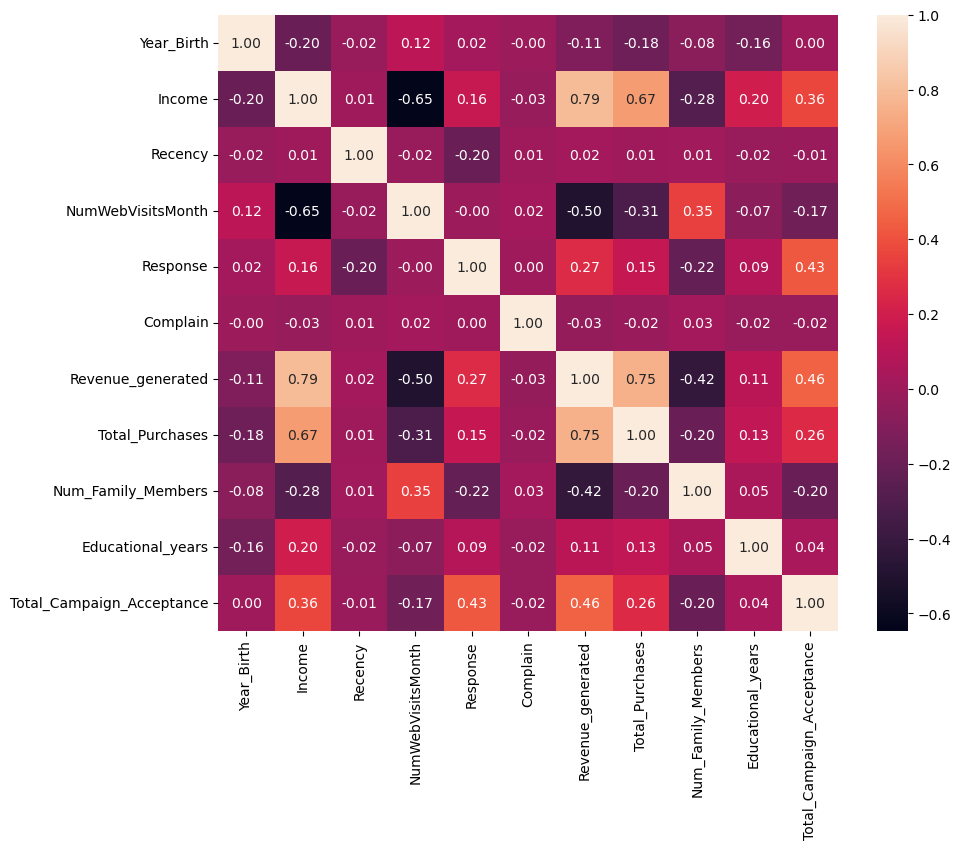

In [481]:
plt.figure(figsize = (10,8))
sns.heatmap(df_corr, annot = True, fmt = '0.2f')

## Section_3: Data Visualization

In [484]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,Revenue_generated,Total_Purchases,Num_Family_Members,Educational_years,Total_Campaign_Acceptance
0,1826,1970,Graduation,Divorced,84835.0,0,0,2014-06-16,0,189,104,379,111,189,218,1,4,4,6,1,0,0,0,0,0,1,0,SP,1190,15,1,16,0
1,1,1961,Graduation,Single,57091.0,0,0,2014-06-15,0,464,5,64,7,0,37,1,7,3,7,5,0,0,0,0,1,1,0,CA,577,18,1,16,1
2,10476,1958,Graduation,Married,67267.0,0,1,2014-05-13,0,134,11,59,15,2,30,1,3,2,5,2,0,0,0,0,0,0,0,US,251,11,3,16,0
3,1386,1967,Graduation,Together,32474.0,1,1,2014-05-11,0,10,0,1,0,0,0,1,1,0,2,7,0,0,0,0,0,0,0,AUS,11,4,4,16,0
4,5371,1989,Graduation,Single,21474.0,1,0,2014-04-08,0,6,16,24,11,0,34,2,3,1,2,7,1,0,0,0,0,1,0,SP,91,8,2,16,1


In [603]:
df_cmps = df[['AcceptedCmp1','AcceptedCmp2','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5']]

### Which marketing campaign is the most successful?

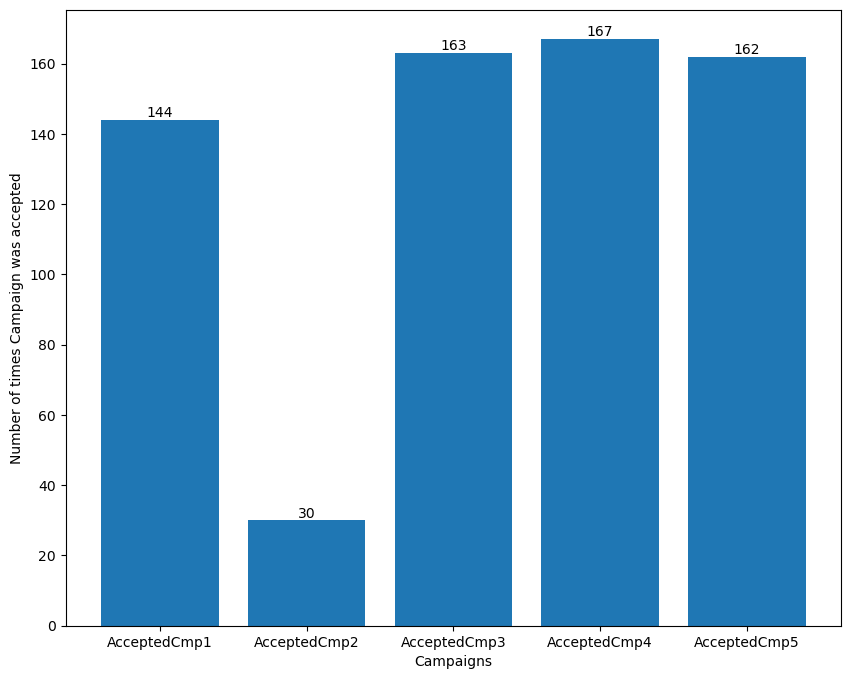

In [601]:
plt.figure(figsize = (10,8))
bars = plt.bar(x = df_cmps.columns, height = df_cmps.sum())
plt.xlabel('Campaigns')
plt.ylabel('Number of times Campaign was accepted')
plt.bar_label(bars)
plt.show()



### The second campaign is the most successful

### Display the total amount spent in each product category

In [612]:
df_prod = df[['MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds']]
df_prod.head()

,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds
0,189,104,379,111,189,218
1,464,5,64,7,0,37
2,134,11,59,15,2,30
3,10,0,1,0,0,0
4,6,16,24,11,0,34


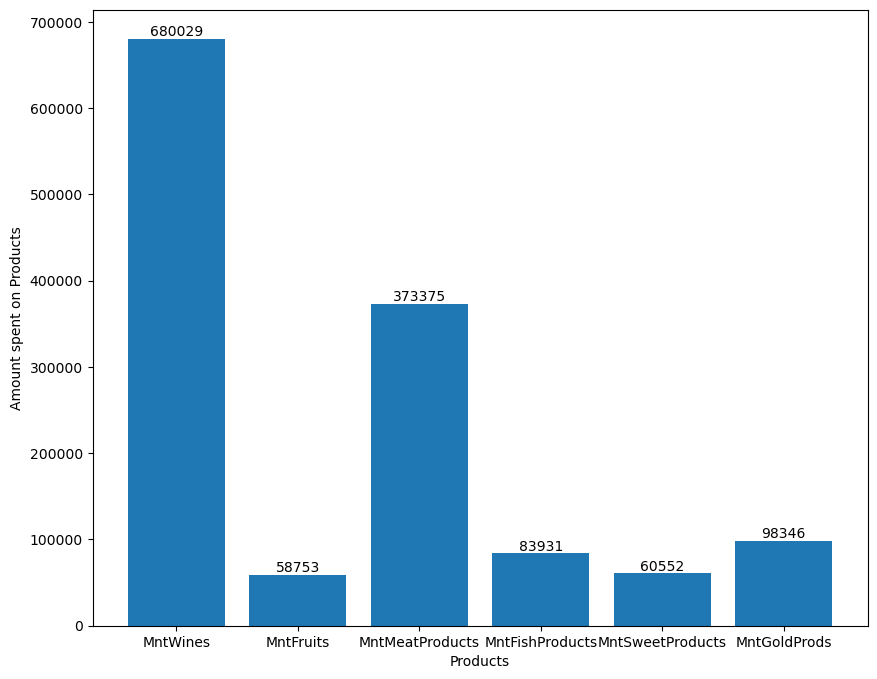

In [616]:
plt.figure(figsize = (10,8))
bars = plt.bar(x = df_prod.columns, height = df_prod.sum())
plt.xlabel('Products')
plt.ylabel('Amount spent on Products')
plt.bar_label(bars)
plt.show()

### What is the average spending in each age group?

In [632]:
df['Age'] = df['Dt_Customer'].dt.year - df['Year_Birth']

In [636]:
df.drop(['age'], axis = 1)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,Revenue_generated,Total_Purchases,Num_Family_Members,Educational_years,Total_Campaign_Acceptance,Age
0,1826,1970,Graduation,Divorced,84835.0,0,0,2014-06-16,0,189,104,379,111,189,218,1,4,4,6,1,0,0,0,0,0,1,0,SP,1190,15,1,16,0,44
1,1,1961,Graduation,Single,57091.0,0,0,2014-06-15,0,464,5,64,7,0,37,1,7,3,7,5,0,0,0,0,1,1,0,CA,577,18,1,16,1,53
2,10476,1958,Graduation,Married,67267.0,0,1,2014-05-13,0,134,11,59,15,2,30,1,3,2,5,2,0,0,0,0,0,0,0,US,251,11,3,16,0,56
3,1386,1967,Graduation,Together,32474.0,1,1,2014-05-11,0,10,0,1,0,0,0,1,1,0,2,7,0,0,0,0,0,0,0,AUS,11,4,4,16,0,47
4,5371,1989,Graduation,Single,21474.0,1,0,2014-04-08,0,6,16,24,11,0,34,2,3,1,2,7,1,0,0,0,0,1,0,SP,91,8,2,16,1,25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10142,1976,PhD,Divorced,66476.0,0,1,2013-03-07,99,372,18,126,47,48,78,2,5,2,11,4,0,0,0,0,0,0,0,US,689,20,2,20,0,37
2236,5263,1977,2n Cycle,Married,31056.0,1,0,2013-01-22,99,5,10,13,3,8,16,1,1,0,3,8,0,0,0,0,0,0,0,SP,55,5,3,18,0,36
2237,22,1976,Graduation,Divorced,46310.0,1,0,2012-12-03,99,185,2,88,15,5,14,2,6,1,5,8,0,0,0,0,0,0,0,SP,309,14,2,16,0,36
2238,528,1978,Graduation,Married,65819.0,0,0,2012-11-29,99,267,38,701,149,165,63,1,5,4,10,3,0,0,0,0,0,0,0,IND,1383,20,2,16,0,34


In [639]:
df['Age'].min()

16

In [641]:
df['Age'].max()

73

In [643]:
bins = [16,20,30,40,50,60,73]
labels = ['16-20','21-30','31-40','41-50','51-60','61-73']

In [645]:
df['Age_Category'] = pd.cut(df['Age'], bins = bins, labels = labels, right = False)

In [647]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,Revenue_generated,Total_Purchases,Num_Family_Members,Educational_years,Total_Campaign_Acceptance,age,Age,Age_Category
0,1826,1970,Graduation,Divorced,84835.0,0,0,2014-06-16,0,189,104,379,111,189,218,1,4,4,6,1,0,0,0,0,0,1,0,SP,1190,15,1,16,0,44,44,41-50
1,1,1961,Graduation,Single,57091.0,0,0,2014-06-15,0,464,5,64,7,0,37,1,7,3,7,5,0,0,0,0,1,1,0,CA,577,18,1,16,1,53,53,51-60
2,10476,1958,Graduation,Married,67267.0,0,1,2014-05-13,0,134,11,59,15,2,30,1,3,2,5,2,0,0,0,0,0,0,0,US,251,11,3,16,0,56,56,51-60
3,1386,1967,Graduation,Together,32474.0,1,1,2014-05-11,0,10,0,1,0,0,0,1,1,0,2,7,0,0,0,0,0,0,0,AUS,11,4,4,16,0,47,47,41-50
4,5371,1989,Graduation,Single,21474.0,1,0,2014-04-08,0,6,16,24,11,0,34,2,3,1,2,7,1,0,0,0,0,1,0,SP,91,8,2,16,1,25,25,21-30


In [653]:
mean_spending = df.groupby('Age_Category')['Revenue_generated'].mean()

C:\Users\miqqi\AppData\Local\Temp\ipykernel_9600\1239341538.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_spending = df.groupby('Age_Category')['Revenue_generated'].mean()


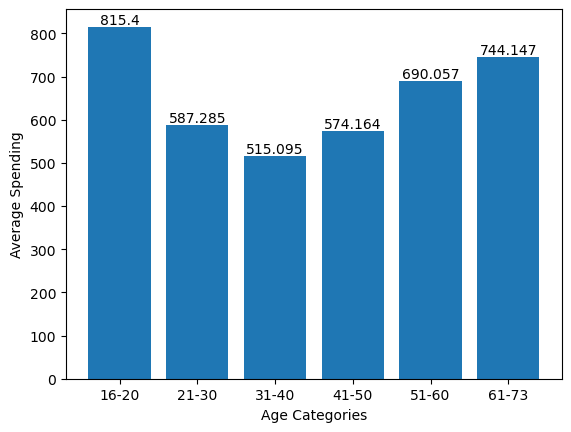

In [667]:
bars = plt.bar(x = labels, height = mean_spending)
plt.xlabel('Age Categories')
plt.ylabel('Average Spending')
plt.bar_label(bars)
plt.show()

### Which products are performing best, and which are performing the least in terms of revenue? Analyze the data and plot a suitable graph to display a report on revenue generated by different products.

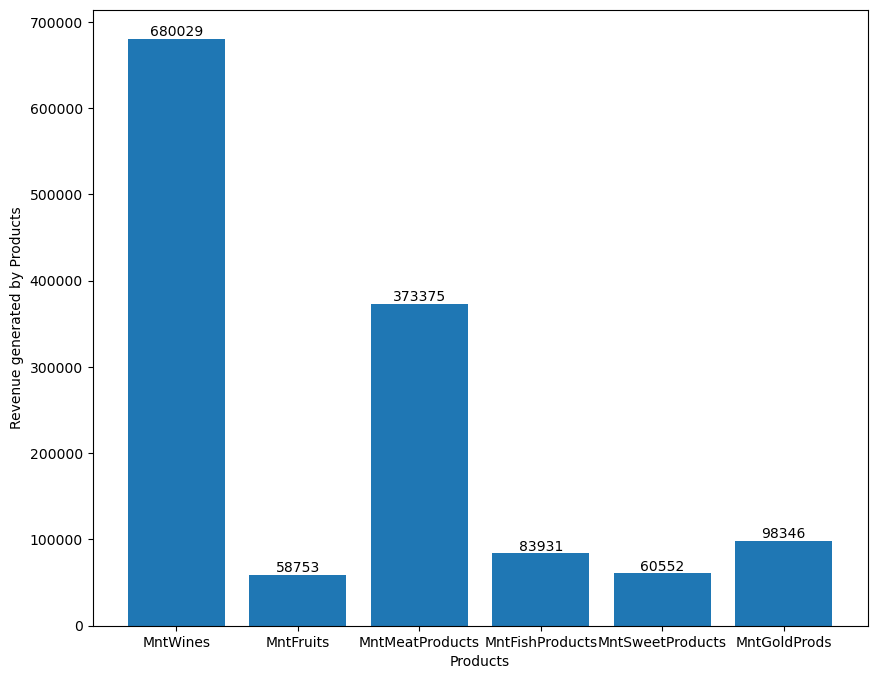

In [672]:
plt.figure(figsize = (10,8))
bars = plt.bar(x = df_prod.columns, height = df_prod.sum())
plt.xlabel('Products')
plt.ylabel('Revenue generated by Products')
plt.bar_label(bars)
plt.show()

### Wines generate most of the revenue
### Fruits generate least

In [681]:
last_campaign = df.groupby('Country')['Response'].sum()

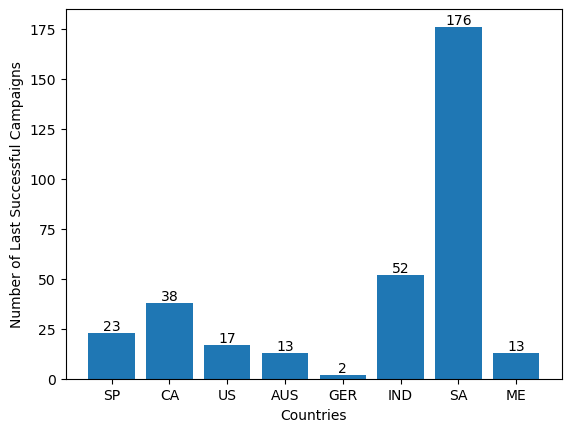

In [693]:
bars = plt.bar(x = df['Country'].unique(), height = last_campaign)
plt.xlabel('Countries')
plt.ylabel('Number of Last Successful Campaigns')
plt.bar_label(bars)
plt.show()

### South Africa has the greatest number of customers who accepted the last campaign